<a href="https://colab.research.google.com/github/pjcroxas/Talent-Retention-in-Railway-Workforce/blob/main/Talent_Retention_in_Railway_Workforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

In [2]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"

In [3]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"
tr_df = pd.read_excel(dir+"/talent-retention-dataset.xlsx")
tr_df.head()

,Age,Sex,HighestEducationalAttainment,YearsofService,Occupation,Organization,NatureofEmployment,JF1,JF2,JL1,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,36-40,Male,Bachelor's Degree,11-15 Years,Government Employee,Light Rail Transit Authority (LRTA),Permanent,3,4,2,...,3,3,3,3,3,3,3,3,3,3
1,46-50,Male,Bachelor's Degree,16-20 Years,Tranport operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,5,...,2,3,4,4,4,3,3,5,5,3
2,36-40,Male,Bachelor's Degree,11-15 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,3,...,4,4,5,5,5,3,3,5,5,4
3,46-50,Male,Bachelor's Degree,16-20 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,5,4,5,...,5,3,4,3,4,3,3,5,5,3
4,26-30,Male,Bachelor's Degree,6-10 Years,Train Driver A,Light Rail Transit Authority (LRTA),Contractual,5,5,4,...,5,3,5,5,5,5,3,5,5,3


In [4]:
tr_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

In [5]:
# Select factorable features
tr_fa = tr_df.drop(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment'], axis=1)

## **Adequacy Test**
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

- Bartlett's Test
- Kaiser-Meyer-Olkin Test


1. *Bartlett's test* of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [6]:
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=bc8afcf8da3df966e0a4c5eb8efe26401ead9094d8a6caf111373ca436ded351
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


In [7]:
# --error

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(tr_fa)
print("chi-square:", chi_square_value)
print("p-value:", p_value)

chi-square: 12754.226147053816
p-value: 0.0


- Using bartlett's test, the value is 0. This means that the test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

2. *Kaiser-Meyer-Olkin (KMO) Test* measures the **suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. `Lower` proportion id more suitable for factor analysis. KMO values ranegs from 0 to 1. General rule is that KMO with value less than 0.6 is considered inadequate.

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(tr_fa)
print("KMO Model:", kmo_model)

KMO Model: 0.9627160992296756


/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


The KMO of this data is 0.96 which indicates that the we can proceed to factor analysis.

## **Factor Analysis**

In [10]:
from factor_analyzer import FactorAnalyzer

In [11]:
# Instantiate model
# We will use 3 factors for JE, TM, and ER
factor_model = FactorAnalyzer(n_factors=3, rotation="varimax")
factor_model.fit(tr_fa)

# Check eigenvalues
ev, v = factor_model.get_eigenvalues()
print(ev)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[23.53129556  3.2589691   2.45678145  1.76702184  1.72875696  0.97092284
  0.8774674   0.78152547  0.73784214  0.68936943  0.65504588  0.58510875
  0.56583979  0.51230918  0.47942383  0.46781293  0.42759064  0.4087876
  0.38995598  0.35930222  0.35228457  0.33449638  0.32286997  0.30929712
  0.29598051  0.27226191  0.26191814  0.25219777  0.24595961  0.23000612
  0.21853522  0.2092527   0.20306643  0.18802813  0.17710636  0.16715195
  0.1573123   0.15287424  0.14484679  0.13751019  0.12179164  0.11244716
  0.11102013  0.1068955   0.09586583  0.08776818  0.08012616]


Here, we can see that only 5 eigenvalues are greater than 1 (23.53, 3.26, 2.46, 1.77, and 1.73). This indicates that we are limited to a maximum of 5 factors. Let's validate this result using scree plot.

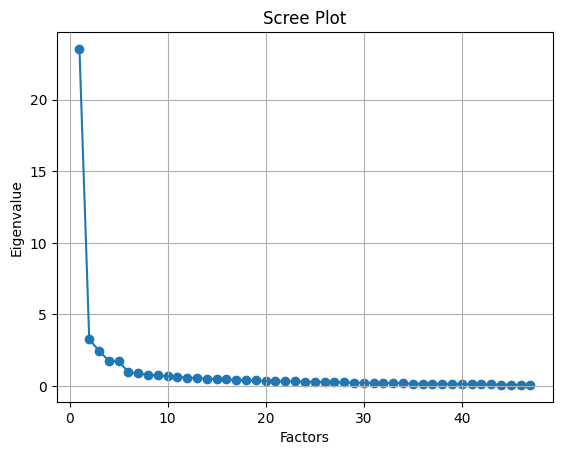

In [12]:
plt.scatter(range(1, tr_fa.shape[1]+1), ev)
plt.plot(range(1, tr_fa.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## **Performing Factor Analysis (rotation="varimax")**

In [13]:
factor_model = FactorAnalyzer(n_factors=3, rotation="varimax")
factor_model.fit(tr_fa)
# factor_model.loadings_
np.shape(factor_model.loadings_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(47, 3)

In [14]:
np.shape(factor_model.loadings_)

(47, 3)

In [15]:
len(tr_fa.columns)

47

In [16]:
cols = ['Factor-1', 'Factor-2', 'Factor-3']
factors = pd.DataFrame(factor_model.loadings_, index=tr_fa.columns, columns=cols)
factors

,Factor-1,Factor-2,Factor-3
JF1,0.470811,0.514594,0.227311
JF2,0.320113,0.666320,0.121686
JL1,0.284295,0.589633,-0.028790
JL2,0.367097,0.687664,-0.030064
JS1,0.243804,0.792872,0.154256
JS2,0.309958,0.748339,0.173211
CF1,0.261130,0.734481,0.114099
CF2,0.230656,0.735213,0.091976
CL1,0.187595,0.614064,-0.053917
CL2,0.193248,0.642895,-0.057478


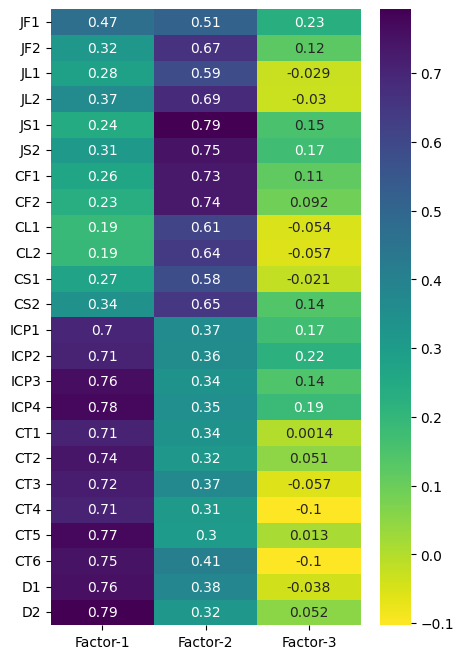

In [17]:
plt.figure(figsize=(5, 8))
sns.heatmap(factors[:24], annot=True, cmap='viridis_r')
plt.show()

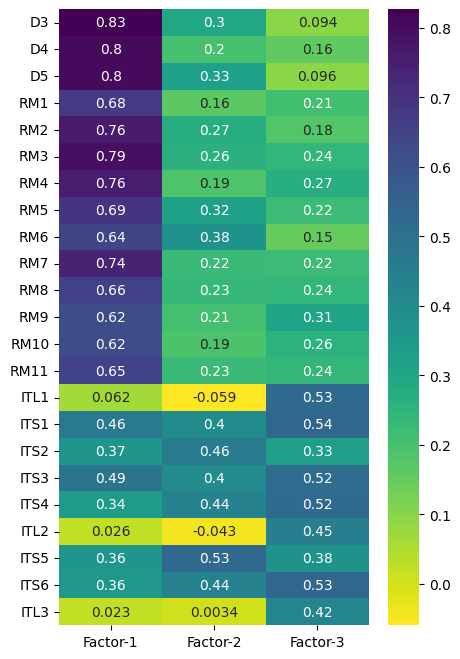

In [18]:
plt.figure(figsize=(5, 8))
sns.heatmap(factors[24:48], annot=True, cmap='viridis_r')
plt.show()

In this heatmap we can see that:
1. Factor 1 (`Job Embeddedness`) has high factor loadings to `Talent Management` subscales such as:
    - ICP1 to ICP 4 (`Identifying Critical Positions`)
    - CT1 - CT6 (`Compentency Training`)
    - D1 - D5 (`Development`)
    - RM1 - RM11 (`Reward Management`)

2. Factor 2 (`Talent Management`) has high factor loadings to `Job Embeddedness` and `Employee Retention` subscales such as:
    - JF1 - JF2 (`Job Fit`)
    - JL1 - JL2 (`Job Link`)
    - JS1 - JS2 (`Job Sacrifice`)
    - CF1 - CF2 (`Community Fit`)
    - CS1 - CS2 (`Community Sacrifice`)
    - CL1 - CL2 (`Community Link`)
    - ITS5 (`Intention To Stay`)

3. Factor 3 (`Employee Retention`) has high factor loadings to its subscales such as:
    - ITL1 (`Intention to Leave`)
    - ITS1,3,4,6 (`Intention to Say`)

In [19]:
gfv = pd.DataFrame(factor_model.get_factor_variance(),
                   columns=["Factor-1", "Factor-2", "Factor-3"],
                   index=["SS loadings", "Prop. Variance", "Cum. Prop. Var."])
gfv

,Factor-1,Factor-2,Factor-3
SS loadings,15.968029,8.938543,3.020509
Prop. Variance,0.339745,0.190182,0.064266
Cum. Prop. Var.,0.339745,0.529927,0.594193


## **Correlations**

<Axes: >

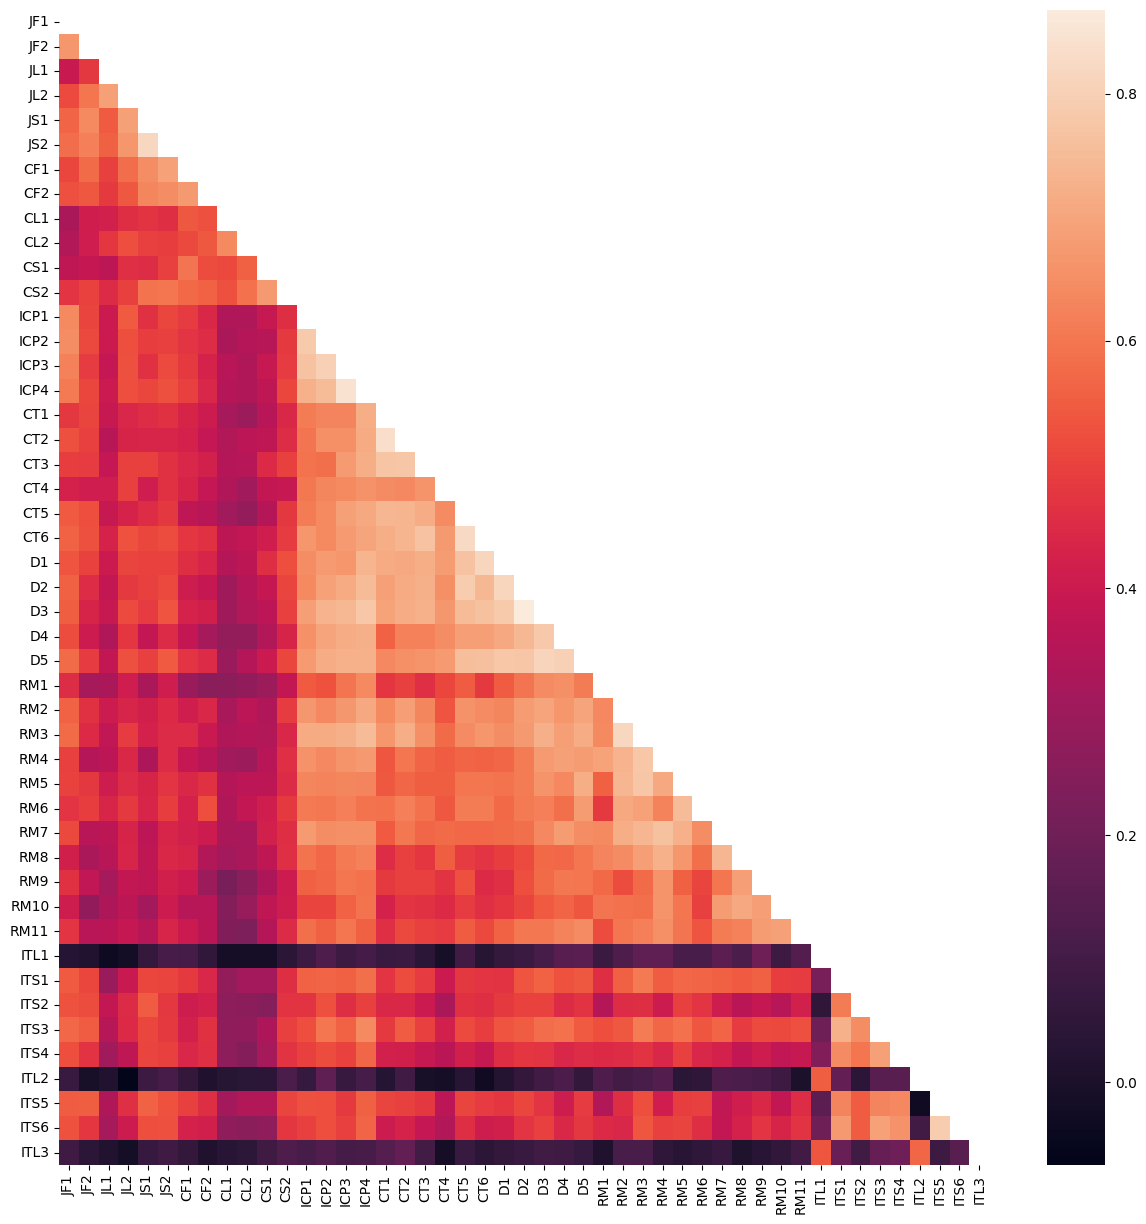

In [20]:
plt.figure(figsize=(15, 15))
fa_corr = tr_fa.corr()
mask = np.triu(np.ones_like(fa_corr, dtype=bool))
sns.heatmap(fa_corr, mask=mask)

In [21]:
# Filter unique high correlation
corr_matrix = tr_fa.corr()
threshold = 0.6
strong_corrs = []

for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):  # Avoid duplicates
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:  # Accounts for both positive and negative correlations
            strong_corrs.append(f"{corr_matrix.index[i]} ~~ {corr_matrix.columns[j]}")

# Format the output
output = "\n".join(strong_corrs)

In [22]:
# print(output)

## **Sequential Equation Modeling**

In [23]:
# Model 1: Define the SEM model specification
model_spec_1 = f"""
# Measurement model
JE =~ JF1 + JF2 + JS1 + JS2 + JL1 + JL2 + CF1 + CF2 + CS1 + CS2 + CL1 + CL2
TM =~ ICP1 + ICP2 + ICP3 + ICP4 + CT1 + CT2 + CT3 + CT4 + CT5 + CT6 + D1 + D2 + D3 + D4 + D5 +RM1 + RM2 + RM3 + RM4 + RM5 + RM6 + RM7 + RM8 + RM9 + RM10 + RM11
TR =~ ITL1 + ITS1 + ITS3 + ITS4 + ITS6 + ITS2 + ITS5

# Regression Model
JE ~ ICP1 + ICP2 + ICP3 + ICP4 + CT1 + CT2 + CT3 + CT4 + CT5 + CT6 + D1 + D2 + D3 + D4 + D5 +RM1 + RM2 + RM3 + RM4 + RM5 + RM6 + RM7 + RM8 + RM9 + RM10 + RM11
TM ~ JF1 + JF2 + JS1 + JS2 + JL1 + JL2 + CF1 + CF2 + CS1 + CS2 + CL1 + CL2 + ITS2 + ITS5
TR ~ ITL1 + ITS1 + ITS3 + ITS4 + ITS6

# Mediation
JE ~ TM
TR ~ JE

# Correlations
{output}
"""

In [24]:
# Model 2: Define the SEM model specification
model_spec = f"""
# Measurement model
JE =~ ICP1 + ICP2 + ICP3 + ICP4 + CT1 + CT2 + CT3 + CT4 + CT5 + CT6 + D1 + D2 + D3 + D4 + D5 +RM1 + RM2 + RM3 + RM4 + RM5 + RM6 + RM7 + RM8 + RM9 + RM10 + RM11
TM =~ JF1 + JF2 + JS1 + JS2 + JL1 + JL2 + CF1 + CF2 + CS1 + CS2 + CL1 + CL2 + ITS2 + ITS5
TR =~ ITL1 + ITS1 + ITS3 + ITS4 + ITS6

# Regression model
JE ~ TM + TR
TM ~ TR

# Correlations
{output}
"""

rel_cols = ['CF1', 'CF2','ICP1', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3', 'D4', 'D5','ICP2', 'ICP3', 'ICP4', 'RM1', 'RM10', 'RM11', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7', 'RM8', 'RM9', 'JF1' , 'JF2' , 'JS1' , 'JS2' , 'JL1' , 'JL2' , 'CS1' , 'CS2' , 'CL1' , 'CL2' , 'ITS5', 'ITL1' , 'ITS1' , 'ITS2' ,'ITS3' , 'ITS4' , 'ITS6']
sem_features = tr_fa[rel_cols]

In [28]:
# !pip install semopy

In [40]:
import semopy
# Define the model
sem_model = semopy.Model(model_spec)
#Fit the model
sem_model.fit(sem_features)
# Inspect the results
print(sem_model.inspect())


     lval  op  rval  Estimate  Std. Err    z-value   p-value
0      JE   ~    TM  0.795271  0.129185   6.156055       0.0
1      JE   ~    TR  0.861885  0.290426   2.967655  0.003001
2      TM   ~    TR  2.087897  0.570287   3.661134  0.000251
3    ICP1   ~    JE  1.000000         -          -         -
4    ICP2   ~    JE  0.974000  0.052344  18.607841       0.0
..    ...  ..   ...       ...       ...        ...       ...
340   CL2  ~~   CL2  0.499162  0.044515  11.213379       0.0
341   CS2  ~~   CS2  0.359508  0.034183  10.517072       0.0
342  ITL1  ~~  ITL1  0.818133  0.069453  11.779719       0.0
343  ITS6  ~~  ITS6  0.166333  0.147803   1.125367  0.260433
344  RM11  ~~  RM11  0.413016   0.03803  10.860276       0.0

[345 rows x 7 columns]


In [ ]:
tr_sem_model = pd.DataFrame(sem_model.inspect())
tr_sem_model.to_excel(dir+"/talent_retention_sem_model.xlsx")
tr_sem_model

In [ ]:
cols_to_convert = ["Estimate", "Std. Err", "z-value", "p-value"]
tr_sem_model[cols_to_convert] = tr_sem_model[cols_to_convert].apply(pd.to_numeric, errors="coerce")

In [ ]:
tr_sem_model_significant = tr_sem_model[tr_sem_model['p-value']<=0.05]
tr_sem_model_significant

In [ ]:
semopy.semplot(sem_model, 'talent_retention_sem_model.png')
print("SEM Model diagram saved as 'talent_retention_sem_model.png'.")
img = plt.imread('talent_retention_sem_model.png')

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.axis('off')
plt.show()

## **Proposition 1**
*Talent management practices may positively influence the link dimension of job embeddedness.*

Text(0.5, 1.0, "Talent Management Subscale's Correlation")

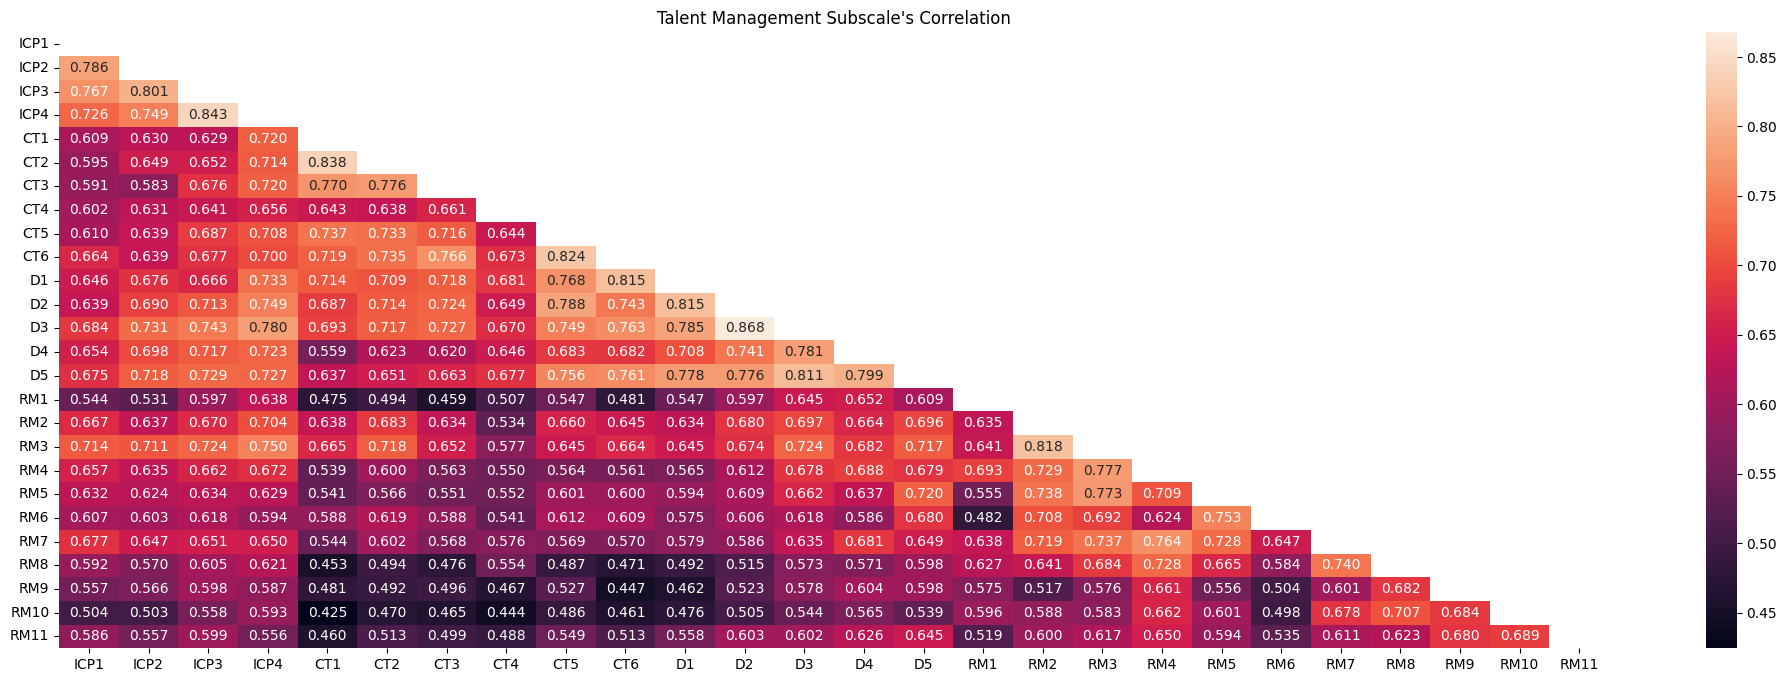

In [29]:
talent_mgmt_corr = tr_fa[tr_fa.columns[12:38]].corr()
mask = np.triu(np.ones_like(talent_mgmt_corr, dtype=bool))
plt.figure(figsize=(25,8))
sns.heatmap(talent_mgmt_corr, mask=mask, fmt=".3f", annot=True)
plt.title("Talent Management Subscale's Correlation")

In [30]:
# Getting the highly-correlated variables
threshold = 0.6
strong_corrs = []

for i in range(talent_mgmt_corr.shape[0]):
    for j in range(i + 1, talent_mgmt_corr.shape[1]):  # Avoid duplicates
        corr_value = talent_mgmt_corr.iloc[i, j]
        if abs(corr_value) >= threshold:  # Accounts for both positive and negative correlations
            strong_corrs.append(f"{talent_mgmt_corr.index[i]} ~~ {talent_mgmt_corr.columns[j]}")

# Format the output
talent_mgmt_output = "\n".join(strong_corrs)


# Compute Covariance

In [53]:
# Talent Management Model Fit
model_specs_TM = f"""
# Measurement model
ICP =~ ICP1 + ICP2 + ICP3 + ICP4
CT =~ CT1 + CT2 + CT3 + CT4 + CT5 + CT6
D =~ D1 + D2 + D3 + D4 + D5
RM =~ RM1 + RM2 + RM3 + RM4 + RM5 + RM6 + RM7 + RM8 + RM9 + RM10 + RM11

# Regression Model
ICP ~ CT + D + RM
CT ~ ICP + D + RM
D ~ ICP + CT + RM
RM ~ ICP + CT + D


"""
{talent_mgmt_output}
talent_mgmt_features = tr_fa[tr_fa.columns[0:38]]

In [54]:
import semopy
# Define the model
TM_sem_model = semopy.Model(model_specs_TM)
#Fit the model
TM_sem_model.fit(talent_mgmt_features)
# Inspect the results
print(TM_sem_model.inspect())

   lval  op rval  Estimate  Std. Err    z-value   p-value
0   ICP   ~   CT  0.181030  0.058599   3.089313  0.002006
1   ICP   ~    D  0.693033  0.066451  10.429288       0.0
2   ICP   ~   RM  0.169110  0.051371   3.291952  0.000995
3    CT   ~  ICP -0.225793  0.035187   -6.41694       0.0
4    CT   ~    D  0.564972  0.046289  12.205251       0.0
..  ...  ..  ...       ...       ...        ...       ...
63  RM5  ~~  RM5  0.221691  0.020561  10.782377       0.0
64  RM6  ~~  RM6  0.275212   0.02451   11.22875       0.0
65  RM7  ~~  RM7  0.223131  0.021016  10.617366       0.0
66  RM8  ~~  RM8  0.287174  0.026138  10.986811       0.0
67  RM9  ~~  RM9  0.423666  0.037283  11.363353       0.0

[68 rows x 7 columns]


SEM Model diagram saved as 'talent_management_sem_model.png'.


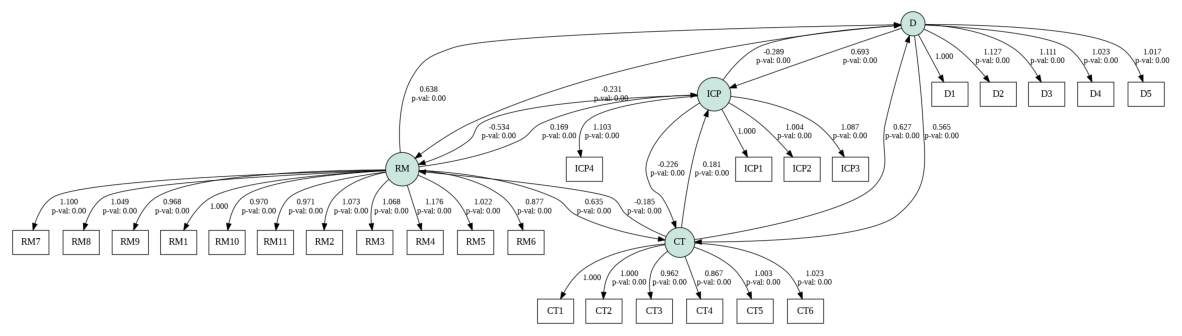

In [55]:
semopy.semplot(TM_sem_model, 'talent_management_sem_model.png')
print("SEM Model diagram saved as 'talent_management_sem_model.png'.")
img = plt.imread('talent_management_sem_model.png')
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [56]:
from semopy import calc_stats
stats = calc_stats(TM_sem_model)
pd.DataFrame(stats)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,287,325,959.690719,0.0,8332.002212,0.915987,0.884819,0.869568,0.884819,0.904864,0.09133,121.193683,354.275735,3.403159
